         x1        x2  y
0  0.107143  0.603070  1
1  0.093318  0.649854  1
2  0.097926  0.705409  1
3  0.155530  0.784357  1
4  0.210829  0.866228  1
data in X :
            x1        x2
0    0.107143  0.603070
1    0.093318  0.649854
2    0.097926  0.705409
3    0.155530  0.784357
4    0.210829  0.866228
..        ...       ...
858  0.994240  0.516667
859  0.964286  0.472807
860  0.975806  0.439474
861  0.989631  0.425439
862  0.996544  0.414912

[863 rows x 2 columns]

data in Y:
 0      1
1      1
2      1
3      1
4      1
      ..
858    1
859    1
860    1
861    1
862    1
Name: y, Length: 863, dtype: int64
Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}
Best parameters set found on development set:

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


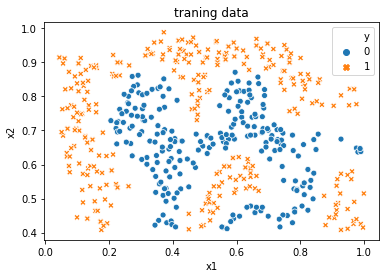

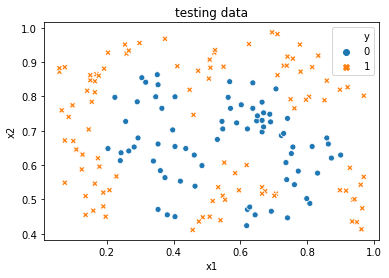

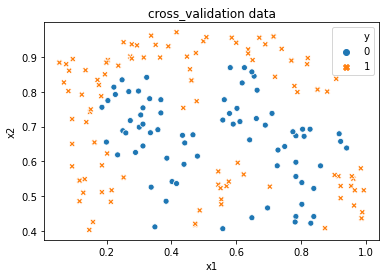

The confusion_matrix of traning data
 


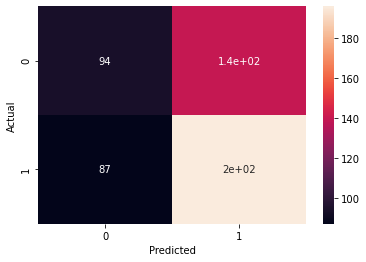

the values of accuracy, prescion, recall, and F1 score for training data

              precision    recall  f1-score   support

           0       0.52      0.40      0.45       234
           1       0.58      0.69      0.63       283

    accuracy                           0.56       517
   macro avg       0.55      0.55      0.54       517
weighted avg       0.55      0.56      0.55       517

0.5609284332688588
The confusion_matrix of testing data
 


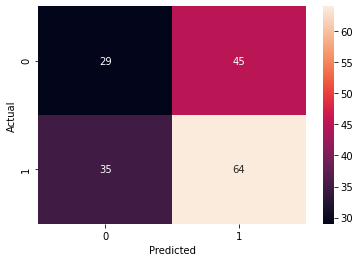

the values of accuracy, prescion, recall, and F1 score for testing data

              precision    recall  f1-score   support

           0       0.45      0.39      0.42        74
           1       0.59      0.65      0.62        99

    accuracy                           0.54       173
   macro avg       0.52      0.52      0.52       173
weighted avg       0.53      0.54      0.53       173

0.5375722543352601
The confusion_matrix of cross_validation data
 


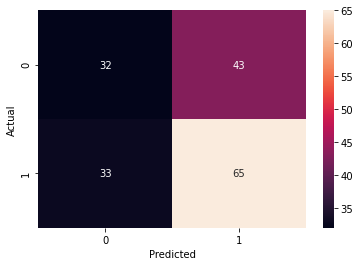

the values of accuracy, prescion, recall, and F1 score for cross_validation data

              precision    recall  f1-score   support

           0       0.49      0.43      0.46        75
           1       0.60      0.66      0.63        98

    accuracy                           0.56       173
   macro avg       0.55      0.54      0.54       173
weighted avg       0.55      0.56      0.56       173

0.5606936416184971


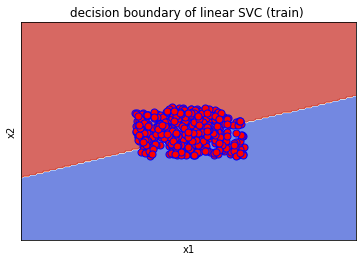

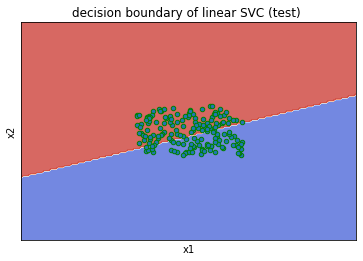

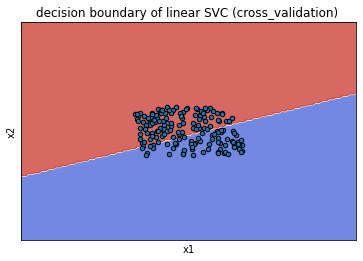

The confusion_matrix of traning data (Gaussian)
 


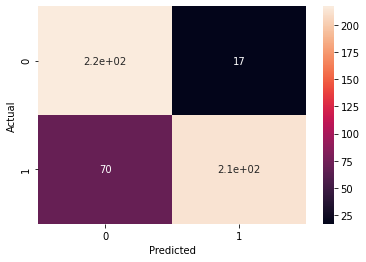

the values of accuracy, prescion, recall, and F1 score for training data (Gaussian)

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       234
           1       0.93      0.75      0.83       283

    accuracy                           0.83       517
   macro avg       0.84      0.84      0.83       517
weighted avg       0.85      0.83      0.83       517

0.8317214700193424
The confusion_matrix of testing data (Gaussian)
 


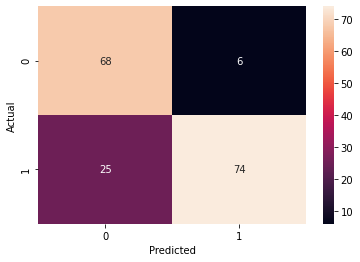

the values of accuracy, prescion, recall, and F1 score for testing data (Gaussian)

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        74
           1       0.93      0.75      0.83        99

    accuracy                           0.82       173
   macro avg       0.83      0.83      0.82       173
weighted avg       0.84      0.82      0.82       173

0.8208092485549133
The confusion_matrix of cross_validation data (Gaussian)
 


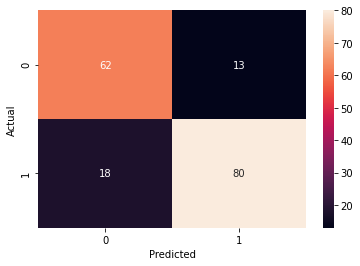

the values of accuracy, prescion, recall, and F1 score for cross_validation data (Gaussian)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        75
           1       0.86      0.82      0.84        98

    accuracy                           0.82       173
   macro avg       0.82      0.82      0.82       173
weighted avg       0.82      0.82      0.82       173

0.8208092485549133


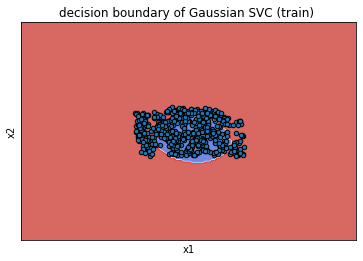

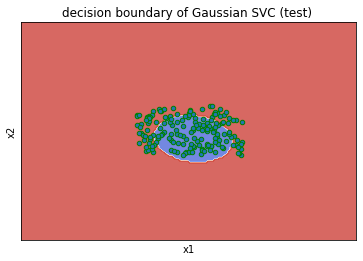

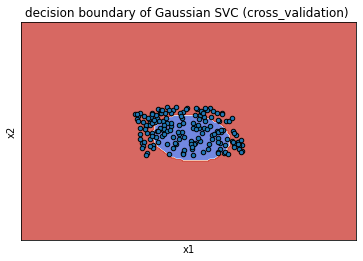

In [2]:
# Importing all the required libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import style
from sklearn import svm
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# Read CSV file into DataFrame df
DataFrame = pd.read_csv("C:\\Users\\GTS\\Desktop\\SVMdataset.csv")

print(DataFrame.head())  # to see the first 5 records of the data

#load data in to x(yearsExperience) and y(salary)
X=DataFrame.iloc[:,0:2]
y = DataFrame['y']
print("data in X :\n",X)
print("\ndata in Y:\n",y)

#Split data into training(60%) ,testing(20%) and cross validation(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1, .01,.001],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 100, 10, 1000]}]

scores = ['f1']

for score in scores:

    clf = GridSearchCV(svm.SVC(), tuned_parameters[1], scoring='%s_macro' % score)
    clf.fit(X_val, y_val)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    
    clf0 = GridSearchCV(svm.SVC(), tuned_parameters[0], scoring='%s_macro' % score)
    clf0.fit(X_val, y_val)

    print("Best parameters set found on development set:")
    print()
    print(clf0.best_params_)



#Visualize training set results
sns.scatterplot(x='x1',y='x2',data=X_train,hue= y,style=y)
plt.title("traning data")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show() # specifies end of graph

#Visualize testing set results
sns.scatterplot(x='x1',y='x2',data=X_test,hue= y,style=y)
plt.title("testing data")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show() # specifies end of graph

#Visualize cross validation set results
sns.scatterplot(x='x1',y='x2',data=X_val,hue= y,style=y)
plt.title("cross_validation data")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show() # specifies end of graph





model = svm.SVC(kernel='linear',C=100)
clf1 = model.fit(X_train, y_train)
clf2 = model.fit(X_test, y_test)
clf3 = model.fit(X_val, y_val)

y_pred_test = clf2.predict(X_test)
y_pred_train = clf1.predict(X_train)
y_pred_val = clf3.predict(X_val)

print("The confusion_matrix of traning data\n ")

#plot Confusion matrix 
confusion_matrix = pd.crosstab(y_train, y_pred_train, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print("the values of accuracy, prescion, recall, and F1 score for training data\n")
print(classification_report(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))


print("The confusion_matrix of testing data\n ")

#plot Confusion matrix 
confusion_matrix = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print("the values of accuracy, prescion, recall, and F1 score for testing data\n")
print(classification_report(y_test,y_pred_test))
print(accuracy_score(y_test, y_pred_test))



print("The confusion_matrix of cross_validation data\n ")

#plot Confusion matrix 
confusion_matrix = pd.crosstab(y_val, y_pred_val, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print("the values of accuracy, prescion, recall, and F1 score for cross_validation data\n")
print(classification_report(y_val,y_pred_val))
print(accuracy_score(y_val, y_pred_val))

fig1, ax1 = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
# title for the plots
title = ('decision boundary of linear SVC (train) ')
# Set-up grid for plotting.

xx1, yy1 = make_meshgrid(X_train.iloc[:, 0], X_train.iloc[:, 1])

plot_contours(ax1, clf1, xx1, yy1, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], cmap=plt.cm.coolwarm, s=50,edgecolors='b',c='red')
ax1.set_ylabel('x2')
ax1.set_xlabel('x1')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title(title)
plt.show()



fig2, ax2 = plt.subplots()
# title for the plots
title = ('decision boundary of linear SVC (test) ')
# Set-up grid for plotting.

xx2, yy2 = make_meshgrid(X_test.iloc[:, 0], X_test.iloc[:, 1])

plot_contours(ax2, clf2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], cmap=plt.cm.coolwarm, s=20, edgecolors='g')
ax2.set_ylabel('x2')
ax2.set_xlabel('x1')
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title(title)
plt.show()


fig3, ax3 = plt.subplots()
# title for the plots
title = ('decision boundary of linear SVC (cross_validation) ')
# Set-up grid for plotting.

xx3, yy3 = make_meshgrid(X_val.iloc[:, 0], X_val.iloc[:, 1])

plot_contours(ax3, clf3, xx3, yy3, cmap=plt.cm.coolwarm, alpha=0.8)
ax3.scatter(X_val.iloc[:, 0], X_val.iloc[:, 1], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax3.set_ylabel('x2')
ax3.set_xlabel('x1')
ax3.set_xticks(())
ax3.set_yticks(())
ax3.set_title(title)
plt.show()


svclassifier =svm.SVC(kernel='rbf',C=1000,gamma= 0.1)
clf4=svclassifier.fit(X_train, y_train)

clf5 = svclassifier.fit(X_test, y_test)
clf6 = svclassifier.fit(X_val, y_val)

y_pred_test1 = clf5.predict(X_test)
y_pred_train1 = clf4.predict(X_train)
y_pred_val1 = clf6.predict(X_val)

print("The confusion_matrix of traning data (Gaussian)\n ")

#plot Confusion matrix 
confusion_matrix = pd.crosstab(y_train, y_pred_train1, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print("the values of accuracy, prescion, recall, and F1 score for training data (Gaussian)\n")
print(classification_report(y_train,y_pred_train1))
print(accuracy_score(y_train,y_pred_train1))


print("The confusion_matrix of testing data (Gaussian)\n ")

#plot Confusion matrix 
confusion_matrix = pd.crosstab(y_test, y_pred_test1, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print("the values of accuracy, prescion, recall, and F1 score for testing data (Gaussian)\n")
print(classification_report(y_test,y_pred_test1))
print(accuracy_score(y_test, y_pred_test1))



print("The confusion_matrix of cross_validation data (Gaussian)\n ")

#plot Confusion matrix 
confusion_matrix = pd.crosstab(y_val, y_pred_val1, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print("the values of accuracy, prescion, recall, and F1 score for cross_validation data (Gaussian)\n")
print(classification_report(y_val,y_pred_val1))
print(accuracy_score(y_val, y_pred_val1))


fig11, ax11 = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
# title for the plots
title = ('decision boundary of Gaussian SVC (train) ')
# Set-up grid for plotting.

xx11, yy11 = make_meshgrid(X_train.iloc[:, 0], X_train.iloc[:, 1])

plot_contours(ax11, clf4, xx11, yy11, cmap=plt.cm.coolwarm, alpha=0.8)
ax11.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], cmap=plt.cm.coolwarm, s=20,edgecolors='black')
ax11.set_ylabel('x2')
ax11.set_xlabel('x1')
ax11.set_xticks(())
ax11.set_yticks(())
ax11.set_title(title)
plt.show()






fig22, ax22 = plt.subplots()
# title for the plots
title = ('decision boundary of Gaussian SVC (test) ')
# Set-up grid for plotting.
xx22, yy22 = make_meshgrid(X_test.iloc[:, 0], X_test.iloc[:, 1])

plot_contours(ax22, clf5, xx22, yy22, cmap=plt.cm.coolwarm, alpha=0.8)
ax22.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], cmap=plt.cm.coolwarm, s=20, edgecolors='g')
ax22.set_ylabel('x2')
ax22.set_xlabel('x1')
ax22.set_xticks(())
ax22.set_yticks(())
ax22.set_title(title)
plt.show()


fig33, ax33 = plt.subplots()
# title for the plots
title = ('decision boundary of Gaussian SVC (cross_validation) ')
# Set-up grid for plotting.
xx33, yy33 = make_meshgrid(X_val.iloc[:, 0], X_val.iloc[:, 1])

plot_contours(ax33, clf6, xx33, yy33, cmap=plt.cm.coolwarm, alpha=0.8)
ax33.scatter(X_val.iloc[:, 0], X_val.iloc[:, 1], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax33.set_ylabel('x2')
ax33.set_xlabel('x1')
ax33.set_xticks(())
ax33.set_yticks(())
ax33.set_title(title)
plt.show()


